### Homework 1 - Part 2 - Task 3 (optional)
You are encouraged but not required to complete this task. <br>
You will use k-means to perform image compression. <br>
There is an image for testing your code: beach.bmp <br>

In [0]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

### Step-0: read an image from a bmp file

(-0.5, 319.5, 213.5, -0.5)

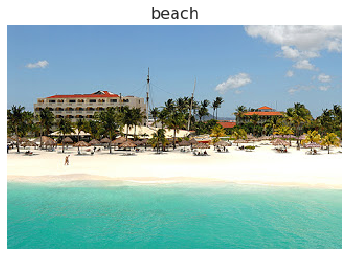

In [6]:
from skimage import io, img_as_float
I = io.imread('beach.bmp')
I = img_as_float(I)
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(I)
ax.set_title('beach', fontsize=16)
ax.axis('off')

The image I is a 3D numpy array <br>
I[i,j,k]: i is row index, j is column index, and k is channel (color) index <br>
I[0,0] is the pixel at row-0 and col-0, and it has three values r,g,b

In [7]:
I.shape

(214, 320, 3)

In [8]:
I[0,0]

array([0.43137255, 0.60392157, 0.78823529])

### Step-1: prepare the data matrix X
each row of X should be a data point - a pixel with three values (R, G, B) <br>
X should have many rows and 3 columns <br>
X is converted from `I`, you may try the function `reshape` <br>
The data type of the matrix `X` should be float32

In [9]:
#your code
X = I.reshape(I.shape[0]*I.shape[1],3)
X

array([[0.43137255, 0.60392157, 0.78823529],
       [0.43137255, 0.60392157, 0.78823529],
       [0.43137255, 0.60392157, 0.78823529],
       ...,
       [0.38823529, 0.70588235, 0.67058824],
       [0.37254902, 0.70196078, 0.64313725],
       [0.37254902, 0.70196078, 0.64313725]])

### Step-2: perform k-means on data matrix X
try different number of clusters, e.g., 5

In [0]:
#your code
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
A = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
labels = np.array(kmeans.labels_)

In [11]:
# centers stores the cluster centers
centers[labels].shape

(68480, 3)

### Step-3: compress the image using the cluster centers
Assume you have obtained some cluster centers, e.g., c1, c2, c3 <br>
Every data point (i.e. every pixel of the image) is assigned to one of the clusters. <br>
To compress the image, you can follow the steps below:<br>
1. Make a copy of the the data matrix X, call it Y
2. Then, modify the data matrix Y, such that every data point is replaced by the corresponding cluster center
3. Convert the data matrix Y back to an image Ic <br>
<br>
in fact, one line of code is enough, you do not need to create Y at all...  <br>

In [12]:
#your code
Y=centers[labels]
Y.shape

(68480, 3)

In [13]:
Ic=Y.reshape(214,320,3)
Ic.shape

(214, 320, 3)

### Step-4: visualize the compressed the image `Ic`

(-0.5, 319.5, 213.5, -0.5)

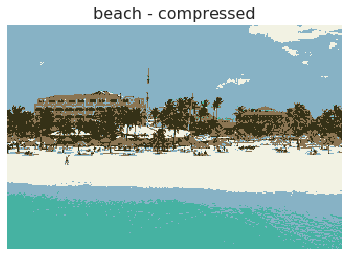

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(Ic)
ax.set_title('beach - compressed', fontsize=16)
ax.axis('off')

### Step-5: save the compressed image to a bmp file

In [0]:
# normalize the pixel values in the range of 0 ~ 255
Is=255*(Ic- Ic.min())/(Ic.max()-Ic.min())
# chagne datay type to unit8
Is=Is.astype('uint8')
io.imsave('beach_compressed_k' + str(5) + '.bmp', Is)

You may find out that the two files, beach.bmp and beach_compressed.bmp, have the same size. <br>
So, it seems nothing is compressed.  <br>
Now, zip the two files: beach.bmp and beach_compressed.bmp <br>
Compare the sizes of the zipped files : beach.zip and beach_compressed.zip <br>
Then, you will know it.  <br>